# Solution Lecture 08 – Fall 2023

Data Science, Fall 2023

Import the libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this lecture, we will demonstrate visualization techniques on the World Bank dataset. This dataset includes information about countries and development statistics from around the world.

Load DataFrame and visualize

In [30]:
wb=pd.read_csv('sets/vis 1/world_bank.csv')
wb=wb.drop(columns={'Unnamed: 0'})
wb.columns

Index(['Continent', 'Country',
       'Primary completion rate: Male: % of relevant age group: 2015',
       'Primary completion rate: Female: % of relevant age group: 2015',
       'Lower secondary completion rate: Male: % of relevant age group: 2015',
       'Lower secondary completion rate: Female: % of relevant age group: 2015',
       'Youth literacy rate: Male: % of ages 15-24: 2005-14',
       'Youth literacy rate: Female: % of ages 15-24: 2005-14',
       'Adult literacy rate: Male: % ages 15 and older: 2005-14',
       'Adult literacy rate: Female: % ages 15 and older: 2005-14',
       'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
       'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
       'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
       'Population: millions: 2016', 'Surface area: sq. km thousands: 2016',
       'Population density: people per sq. km: 2016',
       'Gross nationa

In [3]:
wb.shape

(166, 47)

## Bar Plots

We often use bar plots to display **distributions** of a **categorical variable**.

In the examples below, we plot the distribution of the `"Continent"` column. The cell below uses `.value_counts()` to determine the number of countries corresponding to each continent in the dataset.

In [4]:
vc=wb['Continent'].value_counts()
vc

Africa        47
Europe        43
Asia          34
N. America    18
Oceania       13
S. America    11
Name: Continent, dtype: int64

Now we will use the [Matplotlib](https://matplotlib.org/stable/api/index) and [Seaborn](https://seaborn.pydata.org/api.html) plotting libraries to create visualizations. First, let's generate a bar plot using the Matplotlib function `plt.bar`.

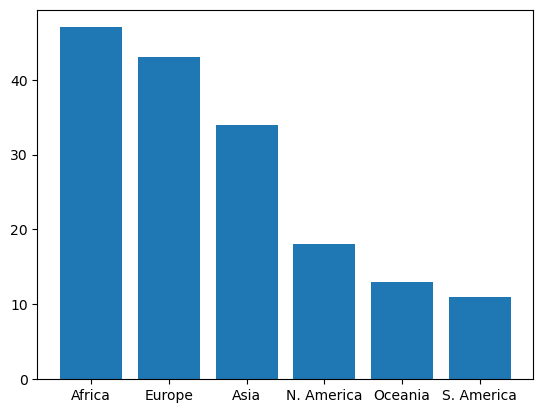

In [5]:
plt.bar(vc.index,vc.values)
plt.show()

Note that we concluded our call to `plt.bar` with a semicolon (`;`). This suppresses any unnecessary output other than the plot. If we do not include a semicolon, the plot will still generate, however, we will see extraneous text as well:

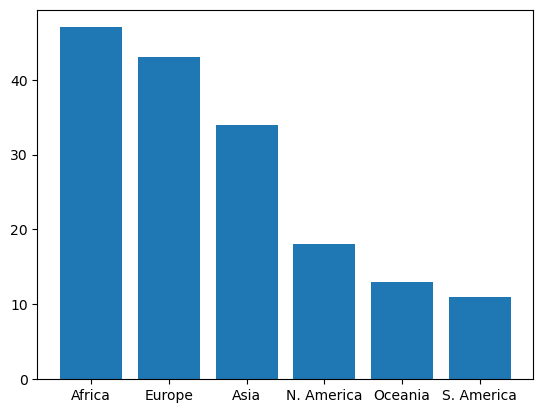

In [6]:
# Code Here
plt.bar(vc.index,vc.values);
plt.show()

We also remember to set the axis labels and the title for the plot.

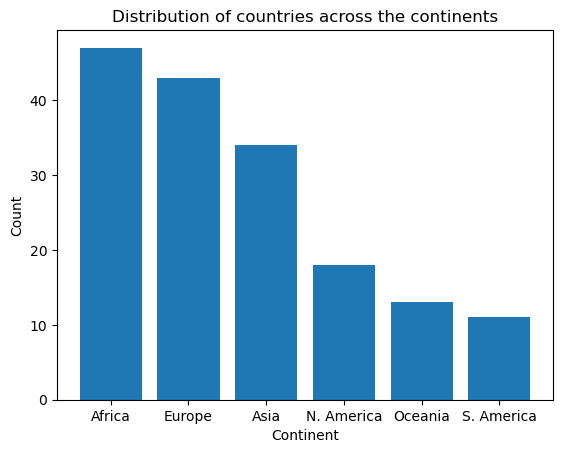

In [7]:
# Code Here
plt.bar(vc.index,vc.values)
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Distribution of countries across the continents')
plt.show()

`pandas` native plotting:

<Axes: >

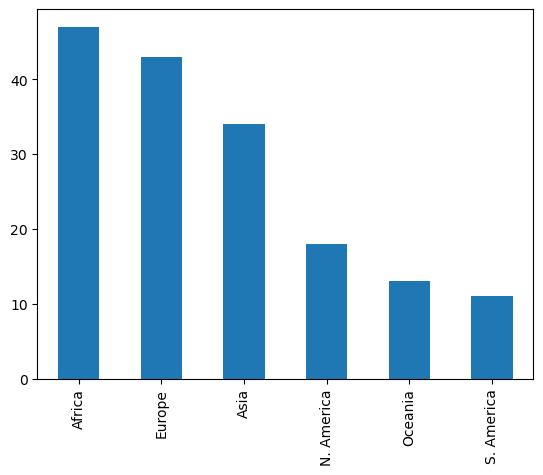

In [8]:
# Code Here
vc.plot(kind='bar')

Equivalently, we could use the `countplot` method of the Seaborn library to create our bar plot.

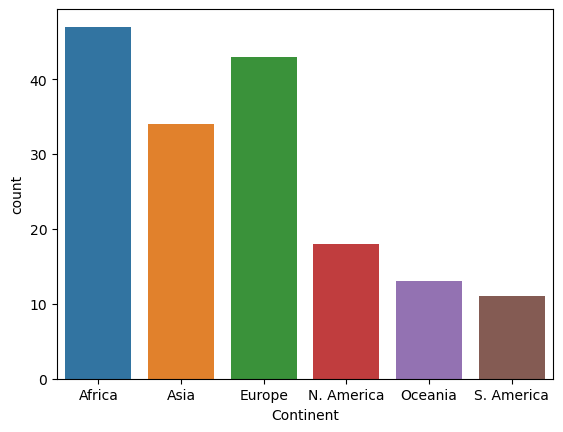

In [9]:
sns.countplot(data=wb,x='Continent')
plt.show()

Above, we said that bar plots should only be used to visualize the distribution of a qualitative (categorical) variable. Why is that? Consider what happens when we try to use `sns.countplot` to visualize a quantitative variable, gross national income per capita.

In [10]:
 wb.iloc[[5,7],[16]]

,"Gross national income, Atlas method: $ billions: 2016"
5,28.2
7,10.4


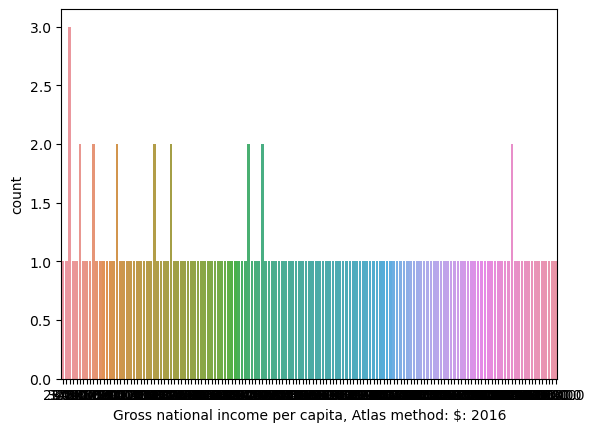

In [33]:
# Code Here
sns.countplot(data=wb,x='Gross national income per capita, Atlas method: $: 2016')
plt.show()

What happened? A bar plot (either `plt.bar` or `sns.countplot`) will create a separate bar for *each* unique value of a variable. With a continuous variable, we may not have a finite number of possible values, which can lead to situations where we would need many, many bars to display each unique value.

To visualize the distribution of a continuous variable, we use a different type of plot:
* Histogram
* Box plot
* Violin plot

## Box Plots and Violin Plots

Box plots and violin plots are two very similar kinds of visualizations. Both display the distribution of a variable using information about quartiles.

In a box plot, the width of the box at any point does not encode meaning. In a violin plot, the width of the plot indicates the *density* of the distribution at each possible value.

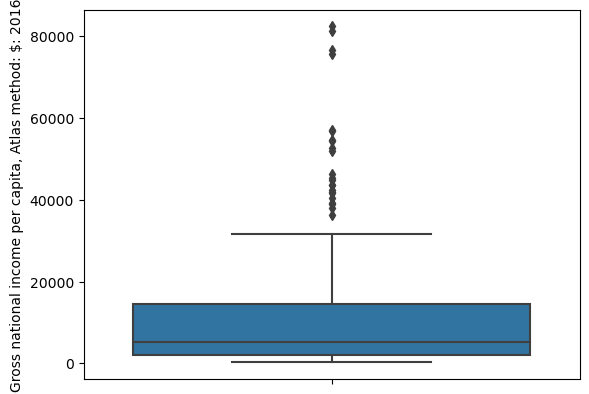

In [34]:
# Code Here, use boxplot
sns.boxplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016");

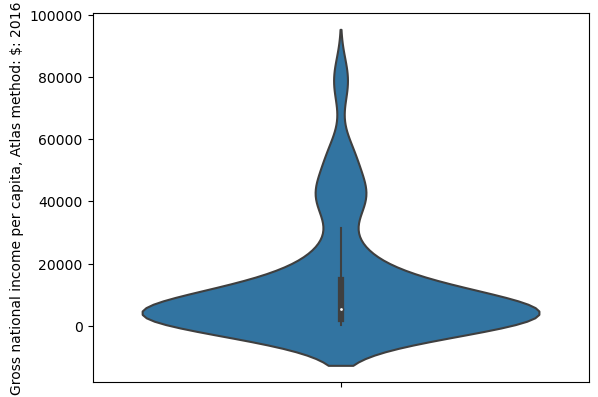

In [35]:
# Code Here, Use voilinplot
sns.violinplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016");

A quartile represents a 25% portion of the data. We say that:
* The first quartile (Q1) repesents the 25th percentile – 25% of the data lies below the first quartile
* The second quartile (Q2) represents the 50th percentile, also known as the median – 50% of the data lies below the second quartile
* The third quartile (Q3) represents the 75th percentile – 75% of the data lies below the third quartile.

This means that the middle 50% of the data lies *between* the first and third quartiles. It would help if you encode quartiles (1st, 2nd, 3rd) information over histogram. This is demonstrated in the histogram below. The three quartiles are marked with red vertical bars.

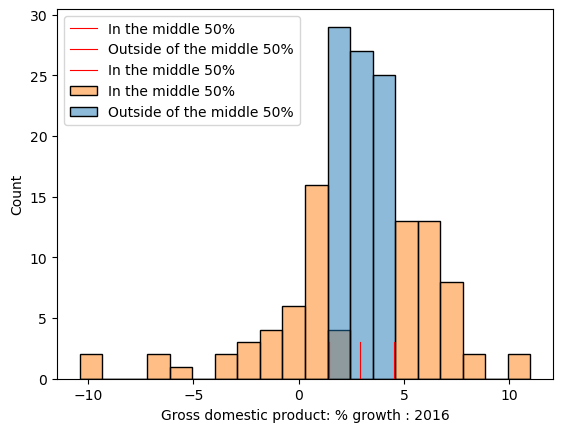

In [50]:
q1 = wb["Gross domestic product: % growth : 2016"].quantile(0.25)
q2 = wb["Gross domestic product: % growth : 2016"].quantile(0.50)
q3 = wb["Gross domestic product: % growth : 2016"].quantile(0.75)

wb['category'] = wb["Gross domestic product: % growth : 2016"].apply(
    lambda x: "Outside of the middle 50%" if (x < q1 or x > q3) else "In the middle 50%"
)

ax = sns.histplot(wb, x="Gross domestic product: % growth : 2016", kde=False, hue='category')
ax.axvline(q1, color='r', linestyle='-', linewidth=0.8, ymax=0.1, label="Q1")
ax.axvline(q2, color='r', linestyle='-', linewidth=0.8, ymax=0.1, label="Q2")
ax.axvline(q3, color='r', linestyle='-', linewidth=0.8, ymax=0.1, label="Q3")

plt.legend(wb['category'])
plt.show()

In a box plot, the lower extent of the box lies at Q1, while the upper extent of the box lies at Q3. The horizontal line in the middle of the box corresponds to Q2 (equivalently, the median).

<Axes: ylabel='Gross domestic product: % growth : 2016'>

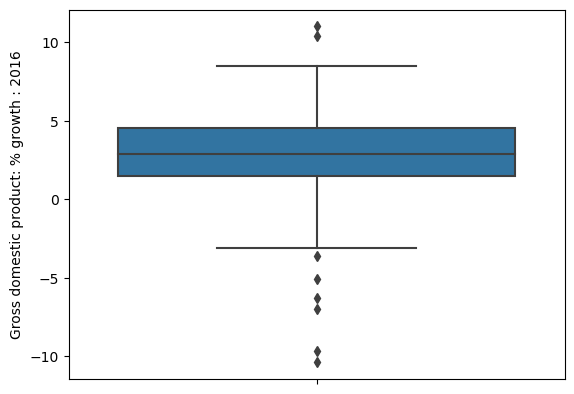

In [15]:
sns.boxplot(data=wb, y="Gross domestic product: % growth : 2016")

A violin plot display quartile information, albeit a bit more subtly. Look closely at the center vertical bar of the violin plot below!

<Axes: ylabel='Gross domestic product: % growth : 2016'>

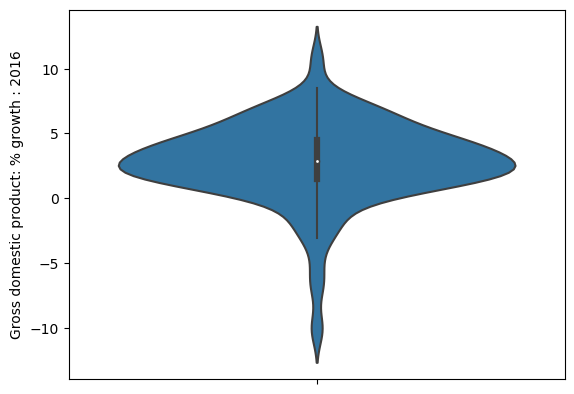

In [16]:
sns.violinplot(data=wb, y="Gross domestic product: % growth : 2016")

<Axes: xlabel='Continent', ylabel='Gross domestic product: % growth : 2016'>

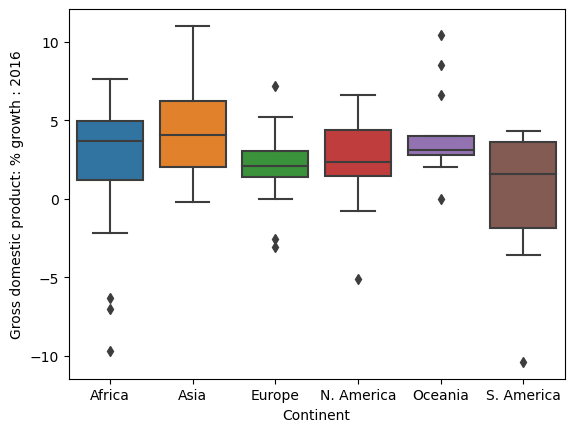

In [17]:
sns.boxplot(data=wb,x='Continent' ,y="Gross domestic product: % growth : 2016")